### Project Insider Data Cleaning

In [373]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from datetime import datetime
from datetime import timedelta
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [374]:
columns = ['transaction_date', 'transaction_type', 'company_name',
           'ticker', 'name', 'position', 'shares_traded', 'avg_price',
           'total_price', 'shares_owned', 'own_type']

#### Insiders Data for ICPT

In [375]:
icpt_insiders = pd.read_csv('insiders.csv',header=None,names = columns)
icpt_insiders.index = pd.to_datetime(icpt_insiders.transaction_date)
icpt_insiders = icpt_insiders.drop('transaction_date',axis=1)
icpt_insiders = icpt_insiders[:-1]



In [376]:
transactions_list = icpt_insiders.transaction_type.tolist()

icpt_insiders['sale_num'] = [1 if item == 'Sale' else 0 for item in transactions_list]
icpt_insiders['buy_num'] = [1 if item == 'Purchase' else 0 for item in transactions_list]



In [206]:
icpt_insiders

,transaction_type,company_name,ticker,name,position,shares_traded,avg_price,total_price,shares_owned,own_type,sale_num,buy_num
transaction_date,,,,,,,,,,,,
2019-07-01,Sale,INTERCEPT PHARMACEUTICALS Inc,ICPT,Bright Lisa,President,595,78.66,46803.0,20452,Direct,1,0
2019-05-14,Purchase,INTERCEPT PHARMACEUTICALS Inc,ICPT,Benatti Luca,Director,1200,83.50,100200.0,7556,Direct,0,1
2019-05-01,Sale,INTERCEPT PHARMACEUTICALS Inc,ICPT,Shapiro David,Chief Medical Officer,2000,86.28,172560.0,41499,Direct,1,0
2019-04-15,Sale,INTERCEPT PHARMACEUTICALS Inc,ICPT,Shapiro David,Chief Medical Officer,2000,95.00,190000.0,41499,Direct,1,0
2019-04-01,Sale,INTERCEPT PHARMACEUTICALS Inc,ICPT,Bright Lisa,President,594,115.00,68316.0,21576,Direct,1,0
2019-04-01,Sale,INTERCEPT PHARMACEUTICALS Inc,ICPT,Shapiro David,Chief Medical Officer,562,115.00,64636.0,40061,Direct,1,0
2019-03-29,Sale,INTERCEPT PHARMACEUTICALS Inc,ICPT,Fundaro Paolo,Director,2171,107.40,233272.0,11114,Direct,1,0
2019-03-01,Sale,INTERCEPT PHARMACEUTICALS Inc,ICPT,Shapiro David,Chief Medical Officer,2000,103.20,206320.0,42543,Direct,1,0
2019-02-27,Sale,INTERCEPT PHARMACEUTICALS Inc,ICPT,Weyer Christian,VP,333,103.20,34352.0,19440,Direct,1,0


In [377]:
icpt_weekly = icpt_insiders.set_index(icpt_insiders.index-timedelta(days=7)).resample('W-SUN')

shares_sum = icpt_weekly.shares_traded.sum()
total_price = icpt_weekly.total_price.sum()
insider_sell = icpt_weekly.sale_num.sum()
insider_buy = icpt_weekly.buy_num.sum()

icpt_left = pd.merge(shares_sum,total_price,on=shares_sum.index)
icpt_right = pd.merge(insider_sell,insider_buy,on=insider_sell.index)

icpt_left = icpt_left.set_index('key_0')
icpt_right = icpt_right.set_index('key_0')

icpt_agg = pd.merge(icpt_left,icpt_right,on=icpt_left.index)
icpt_agg = icpt_agg.set_index('key_0')
icpt_agg.index.name = 'Date'

In [277]:
icpt_agg.head()

,shares_traded,total_price,sale_num,buy_num
Date,,,,
2012-10-14,1033334,15500010.0,0,2
2012-10-21,0,0.0,0,0
2012-10-28,0,0.0,0,0
2012-11-04,0,0.0,0,0
2012-11-11,0,0.0,0,0


#### Daily Price Data for ICPT

In [378]:
ticker = list(set(icpt_insiders.ticker))[0]
start_date = '2012-10-14'
end_date = '2019-07-07'

In [379]:
icpt_data = data.DataReader(ticker,'yahoo',start_date,end_date)

In [381]:
icpt_data['Return'] = icpt_data['Adj Close'].diff()
icpt_data['Log_Return'] = [math.log(item) for item in icpt_data['Adj Close'].tolist()]
icpt_data['Log_Return'] = icpt_data['Log_Return'].diff()




In [369]:
icpt_data.head()

,High,Low,Open,Close,Volume,Adj Close,Return,Log_Return
Date,,,,,,,,
2012-10-15,19.549999,18.590000,19.000000,19.260000,54300,19.260000,NaN,NaN
2012-10-16,19.910000,19.200001,19.290001,19.670000,80500,19.670000,0.410000,0.021064
2012-10-17,20.000000,19.260000,20.000000,19.780001,13600,19.780001,0.110001,0.005577
2012-10-18,20.010000,19.580000,19.580000,20.000000,29200,20.000000,0.219999,0.011061
2012-10-19,20.299999,19.650000,19.920000,19.969999,114900,19.969999,-0.030001,-0.001501


In [384]:
icpt_data_weekly = icpt_data.set_index(icpt_data.index-timedelta(days=7)).resample('W-SUN').sum()[['Volume','Return','Log_Return']]
icpt_data_weekly.head()

,Volume,Return,Log_Return
Date,,,
2012-10-14,292500,0.709999,0.036201
2012-10-21,62000,-0.949999,-0.048740
2012-10-28,41500,-0.270000,-0.014297
2012-11-04,259000,1.250000,0.064539
2012-11-11,150900,1.500000,0.072321


#### Full dataset

In [389]:
icpt_full = pd.merge(icpt_agg,icpt_data_weekly, on=icpt_agg.index)
icpt_full = icpt_full.set_index('key_0')
icpt_full.index.name = 'Date'
icpt_full.head()

,shares_traded,total_price,sale_num,buy_num,Volume,Return,Log_Return
Date,,,,,,,
2012-10-14,1033334,15500010.0,0,2,292500,0.709999,0.036201
2012-10-21,0,0.0,0,0,62000,-0.949999,-0.048740
2012-10-28,0,0.0,0,0,41500,-0.270000,-0.014297
2012-11-04,0,0.0,0,0,259000,1.250000,0.064539
2012-11-11,0,0.0,0,0,150900,1.500000,0.072321


In [394]:
icpt_full.sale_num[icpt_full.sale_num > 0] = 1
icpt_full.buy_num[icpt_full.buy_num>0] = 1
icpt_full['return_dummy'] = icpt_full.Log_Return
icpt_full.return_dummy[icpt_full.return_dummy<0]=0
icpt_full.return_dummy[icpt_full.return_dummy>0]=1

/Users/mdrozdov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mdrozdov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mdrozdov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/mdrozdov/anaconda3/li

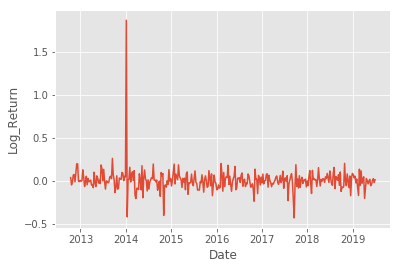

In [386]:
sns.lineplot(x=icpt_full.index,y=icpt_full.Log_Return,data=icpt_full)

In [355]:
import math


2.302585092994046

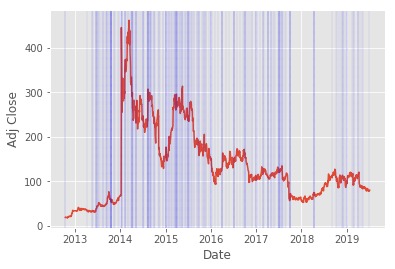

In [332]:
sns.lineplot(x=icpt_data.index,y=icpt_data['Adj Close'])
for x in icpt_insiders.index.tolist():
    plt.axvline(x,linestyle='--',linewidth=0.1,c='b')

#### Logistic Regression

In [335]:
import statsmodels.api as sm

In [348]:
X = icpt_full[['shares_traded','sale_num','buy_num']]

In [395]:
logit_model = sm.Logit(icpt_full.return_dummy, X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.691956
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.001   
Dependent Variable: return_dummy     AIC:              491.7531
Date:               2019-07-08 10:41 BIC:              503.3355
No. Observations:   351              Log-Likelihood:   -242.88 
Df Model:           2                LL-Null:          -243.12 
Df Residuals:       348              LLR p-value:      0.78215 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
---------------------------------------------------------------
shares_traded    -0.0000   0.0000 -0.7245 0.4688 -0.0000 0.0000
sale_num          0.0189   0.1703  0.1111 0.9115 -0.3148 0.3527
buy_num           0.5420   